In [25]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 12.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
yeomi_review = db['yeomi_review']
yeomi_review = yeomi_review.find()
yeomi_review = pd.DataFrame(yeomi_review)
kto9suk9suk_review = db['kto9suk9suk_review']
kto9suk9suk_review = kto9suk9suk_review.find()
kto9suk9suk_review = pd.DataFrame(kto9suk9suk_review)

# 데이터 전처리

## 여행에 미치다 페이지에서 국내 여행 게시글만 가져오기

In [2]:
list_region = ['#강원','#경기','#경남','#경북','#광주','#대구','#대전','#부산','#서울','#세종','#울산','#인천','#전남','#전북','#제주','#충남','#충북','#강릉','#고성','#동해','#삼척','#속초','#양구','#양양','#영월','#원주','#인제','#정선','#철원','#춘천','#태백','#평창','#홍천','#화천','#횡성','#가평','#고양','#과천','#광명','#광주','#구리','#군포','#김포','#남양주','#동두천','#부천','#성남','#수원','#시흥','#안산','#안성','#안양','#양주','#양평','#여주','#연천','#오산','#용인','#의왕','#의정부','#이천','#파주','#평택','#포천','#하남','#화성','#거제','#거창','#고성','#김해','#남해','#밀양','#사천','#산청','#양산','#의령','#진주','#창녕','#창원','#통영','#하동','#함안','#함양','#합천','#경산','#경주','#고령','#구미','#김천','#문경','#봉화','#상주','#성주','#안동','#영덕','#영양','#영주','#영천','#예천','#울릉','#울진','#의성','#청도','#청송','#칠곡','#포항','#광산','#남구','#동구','#북구','#서구','#군위','#남구','#달서','#달성','#동구','#북구','#서구','#수성','#중구','#대덕','#동구','#서구','#유성','#중구','#강서','#금정','#기장','#남구','#동구','#동래','#부산진','#북구','#사상','#사하','#서구','#수영','#연제','#영도','#중구','#해운대','#강남','#강동','#강북','#강서','#관악','#광진','#구로','#금천','#노원','#도봉','#동대문','#동작','#마포','#서대문','#서초','#성동','#성북','#송파','#양천','#영등포','#용산','#은평','#종로','#중구','#중랑','#남구','#동구','#북구','#울주','#중구','#강화','#계양','#남동','#동구','#미추홀','#부평','#서구','#연수','#옹진','#중구','#강진','#고흥','#곡성','#광양','#구례','#나주시','#담양','#목포','#무안','#보성','#순천','#신안','#여수','#영광','#영암','#완도','#장성','#장흥','#진도','#함평','#해남','#화순','#고창','#군산','#김제','#남원','#무주','#부안','#순창','#완주','#익산','#임실','#장수','#전주','#정읍','#진안','#서귀포','#제주','#계룡','#공주','#금산','#논산','#당진','#보령','#부여','#서산','#서천','#아산','#예산','#천안','#청양','#태안','#홍성','#괴산','#단양','#보은','#영동','#옥천','#음성','#제천','#증평','#진천','#청주','#충주']
korea_trip = []
for i in yeomi_review[yeomi_review['review_content'].isna()]['card_content']:
    for j in list_region:
        if j in i:
            korea_trip.append(i)
            break
condition_region = f"card_content in {korea_trip}"
korea_yeomi_review = yeomi_review.query(condition_region)
korea_yeomi_review

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
201,65f9bf4f08bfcc46ca193606,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,NaN,NaN
202,65f9bf4f08bfcc46ca193607,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@shorokhofff,2018년 6월 22일
203,65f9bf4f08bfcc46ca193608,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@soye0114 여기 다니엘 뮤비 찍은곳인가???!!!,2018년 2월 24일
204,65f9bf5008bfcc46ca193609,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@h.a.ing 요기봐 ㅋㅋㅋㅋㅋㅋ,2018년 2월 8일
205,65f9bf5008bfcc46ca19360a,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@dal.hye 야 나 여기 가고싶어ㅠㅠㅠ,2018년 1월 28일
...,...,...,...,...,...,...,...,...
1152424,662b80e0f231019cd5b61943,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,NaN,NaN
1152425,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일
1152426,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일
1152427,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일


## 구석구석 페이지와 여행에 미치다 페이지에서 가져온 데이터 합치기

In [3]:
kto9suk9suk_review

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
...,...,...,...,...,...,...,...,...
125933,662a1fb44a4fe5fadf3f71ee,신규 개장 기념 무료 운영 중(~5/6)‼ 짜릿함 최고인😆 김천 #사계절썰매장\n\...,2024년 4월 25일,106,,C6LYPKTSzun,🛷,2024년 4월 25일
125934,662f1d43b33c9dc30aa95f3f,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN
125935,662f1d4bb33c9dc30aa95f40,범선의 휘황찬란한 실루엣이 영덕 대게를 먹으러 찾는 방문객을 반기는 이곳 +_+ 대...,2014년 8월 26일,100,,sJhwZxzTCf,NaN,NaN
125936,662f22cb5cb025207273f6f6,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN


In [4]:
df_sns = pd.concat([kto9suk9suk_review, korea_yeomi_review], ignore_index=True)
df_sns

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
...,...,...,...,...,...,...,...,...
599153,662b80e0f231019cd5b61943,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,NaN,NaN
599154,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일
599155,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일
599156,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일


## 어느 지역에 관한 표시

In [5]:
region_gw = ['강원도 ','강원 ','강원특별자치도 ','#강원','#강릉', '#고성', '#동해', '#삼척', '#속초', '#양구', '#양양', '#영월', '#원주', '#인제', '#정선', '#철원', '#춘천', '#태백', '#평창', '#홍천', '#화천', '#횡성']
region_gg = ['경기도 ','경기 ','#경기','#가평', '#고양', '#과천', '#광명', '#구리', '#군포', '#김포', '#남양주', '#동두천', '#부천', '#성남', '#수원', '#시흥', '#안산', '#안성', '#안양', '#양주', '#양평', '#여주', '#연천', '#오산', '#용인', '#의왕', '#의정부', '#이천', '#파주', '#평택', '#포천', '#하남', '#화성']
region_gn = ['경상남도 ','경남 ','#경남 ','#거제', '#거창', '#고성', '#김해', '#남해', '#밀양', '#사천', '#산청', '#양산', '#의령', '#진주', '#창녕', '#창원', '통영', '#하동', '#함안', '#함양', '#합천']
region_gb = ['경상북도 ','경북 ','#경북','#경산', '#경주', '#고령', '#구미', '#김천', '#문경', '#봉화', '#상주', '#성주', '#안동', '#영덕', '#영양', '#영주', '#영천', '#예천', '#울릉', '#울진', '#의성', '#청도', '#청송', '#칠곡', '#포항']
region_gj = ['광주광역시 ','광주 ','#광주','#광산']
region_dg = ['대구광역시 ','대구 ','#대구','#군위', '#달서', '#달성', '#수성']
region_dj = ['대전광역시 ','대전 ','#대전','#대덕',   '#유성']
region_sj = ['세종특별자치시 ','세종 ','#세종']
region_bs = ['부산특별시 ','부산 ','#부산', '#금정', '#기장',  '#동래', '#부산진', '#사상', '#사하',  '#수영', '#연제', '#영도',  '#해운대']
region_su = ['서울특별시 ','서울 ','#서울','#강남', '#강동', '#강북', '#관악', '#광진', '#구로', '#금천', '#노원', '#도봉', '#동대문', '#동작', '#마포', '#서대문', '#서초', '#성동', '#성북', '#송파', '#양천', '#영등포', '#용산', '#은평', '#종로',  '#중랑']
region_us = ['울산광역시 ', '울산 ','#울산', '#울주']
region_ic = ['인천광역시 ','인천 ','#인천','#강화', '#계양', '#남동',  '#미추홀', '#부평',  '#연수', '#옹진']
region_jn = ['전라남도 ','전남 ','#강진', '#전남','#고흥', '#곡성', '#광양', '#구례', '#나주', '#담양', '#목포', '#무안', '#보성', '#순천', '#신안', '#여수', '#영광', '#영암', '#완도', '#장성', '#장흥', '#진도', '#함평', '#해남', '#화순']
region_jb = ['전라북도 ','전북 ','#고창', '#전북','#군산', '#김제', '#남원', '#무주', '#부안', '#순창', '#완주', '#익산', '#임실', '#장수', '#전주', '#정읍', '#진안']
region_jj = ['제주특별자치도 ','제주 ','#서귀포', '#제주']
region_cn = ['충청남도 ','충남 ','#충남','#계룡', '#공주', '#금산', '#논산', '#당진', '#보령', '#부여', '#서산', '#서천', '#아산', '#예산', '#천안', '#청양', '#태안', '#홍성']
region_cb = ['충청북도 ','충북 ','#충북','#괴산', '#단양', '#보은', '#영동', '#옥천', '#음성', '#제천', '#증평', '#진천', '#청주', '#충주']

In [6]:
from collections import Counter

for i in range(len(df_sns)):
    region_tour=[]
    city_tour = []
    for j in region_gw:
        if j in df_sns['card_content'][i]:
            region_tour.append('강원')
            city_tour.append(j)
    for j in region_gg:
        if j in df_sns['card_content'][i]:
            region_tour.append('경기')
            city_tour.append(j)
    for j in region_gn:
        if j in df_sns['card_content'][i]:
            region_tour.append('경남')
            city_tour.append(j)
    for j in region_gj:
        if j in df_sns['card_content'][i]:
            region_tour.append('광주')   
            city_tour.append(j)
    for j in region_gb:
        if j in df_sns['card_content'][i]:
            region_tour.append('경북')   
            city_tour.append(j)
    for j in region_sj:
        if j in df_sns['card_content'][i]:
            region_tour.append('세종')   
            city_tour.append(j)
    for j in region_dg:
        if j in df_sns['card_content'][i]:
            region_tour.append('대구')
            city_tour.append(j)
    for j in region_dj:
        if j in df_sns['card_content'][i]:
            region_tour.append('대전')
            city_tour.append(j)
    for j in region_bs:
        if j in df_sns['card_content'][i]:
            region_tour.append('부산')
            city_tour.append(j)
    for j in region_su:
        if j in df_sns['card_content'][i]:
            region_tour.append('서울')
            city_tour.append(j)
    for j in region_us:
        if j in df_sns['card_content'][i]:
            region_tour.append('울산')
            city_tour.append(j)
    for j in region_ic:
        if j in df_sns['card_content'][i]:
            region_tour.append('인천')
            city_tour.append(j)
    for j in region_jn:
        if j in df_sns['card_content'][i]:
            region_tour.append('전남')    
            city_tour.append(j)
    for j in region_jb:
        if j in df_sns['card_content'][i]:
            region_tour.append('전북')
            city_tour.append(j)
    for j in region_jj:
        if j in df_sns['card_content'][i]:
            region_tour.append('제주')
            city_tour.append(j)
    for j in region_cn:
        if j in df_sns['card_content'][i]:
            region_tour.append('충남')
            city_tour.append(j)
    for j in region_cb:
        if j in df_sns['card_content'][i]:
            region_tour.append('충북')
            city_tour.append(j)
    word_region = Counter(region_tour)
    most_common_region = word_region.most_common(1)
    most_common_region_keys = [word for word, count in most_common_region]
    word_city = Counter(city_tour)
    most_common_city = word_city.most_common(1)
    most_common_city_keys = [word for word, count in most_common_city]
    df_sns.loc[i, 'region'] = ", ".join(most_common_region_keys)
    df_sns.loc[i, 'city'] = ", ".join(city_tour)


## 댓글에 관한 데이터와 제목에 관한 데이터 분류

In [7]:
df_sns_review = df_sns[df_sns['review_content'].notna()]
df_sns_title = df_sns[df_sns['review_content'].isna()]
df_sns_review = df_sns_review.reset_index()
df_sns_review
df_sns_title = df_sns_title.reset_index()
df_sns_title


,index,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date,region,city
0,0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN,,
1,3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN,부산,부산
2,4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN,제주,#제주
3,7,65f99f8d08bfcc46ca193524,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,,qTGZrrzTAH,NaN,NaN,울산,"울산 , #울산"
4,11,65f99f8f08bfcc46ca193528,비가 내린 후에야 진정한 모습을 드러내는 시무지기폭포\n이 비경을 만나러 가는 고된...,2014년 7월 12일,39,,qVtXCrTTIY,NaN,NaN,광주,"광주 , #광주"
...,...,...,...,...,...,...,...,...,...,...,...
5187,599013,662abcaaf231019cd5b60515,"드디어 다음주, 국가권력급 벚꽃맛집 ‘여의도’ 봄꽃축제 개막 (뿌뿌-)\n\n누가 ...",2024년 3월 23일,3091,,C41qMeoBkpF,NaN,NaN,서울,"서울 , #서울"
5188,599038,662abe16f231019cd5b60b80,지금 제일 핫하다는 기안84 전시 ‘기안도(奇案島)’ 후기 🔥\n다들 여기서 기안8...,2024년 3월 26일,4752,,C49-AnfBEhj,NaN,NaN,서울,"서울 , #서울"
5189,599137,662ada15f231019cd5b61622,"지친 일상으로부터 벗어날 수 있는 시간, 응봉산에서 🌙\n\n이번 한주도 수고한 여...",2024년 4월 19일,1530,,C58BRwIhdW4,NaN,NaN,서울,"서울 , #서울"
5190,599140,662af284f231019cd5b61861,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,,C6I3IZBhfzp,NaN,NaN,경남,#거창


In [8]:
pivot_review = pd.pivot_table(df_sns_review,index=['region','card_content','card_date','card_like','card_watch'],values='_id',aggfunc='count')
df_sns_title = pivot_review.reset_index()

In [9]:
len(df_sns_title)

4652

In [12]:
df_sns_title.loc[:,'card_content'] = df_sns_title['card_content'].apply(split)

In [ ]:
def split(text):
    new_text = text.replace("#", " ")
    return " ".join(new_text.split())

## 계절별로 분류

In [13]:
for i in range(len(df_sns_title)):
    df_sns_title.loc[i,'card_month'] = df_sns_title.loc[i,'card_date'].split()[1][:-1]
    if df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['3','4','5']:
        df_sns_title.loc[i,'card_season'] = '봄'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['6','7','8']:
        df_sns_title.loc[i,'card_season']  = '여름'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['9','10','11']:
        df_sns_title.loc[i,'card_season']  = '가을'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['12','1','2']:
        df_sns_title.loc[i,'card_season'] = '겨울'


In [14]:
df_sns_title['card_season'].value_counts()

card_season
여름    1280
가을    1178
봄     1130
겨울    1064
Name: count, dtype: int64

In [15]:
df_sns_title['card_month'].value_counts()

card_month
8     487
7     413
10    397
11    396
3     395
9     385
6     380
1     375
12    373
5     373
4     362
2     316
Name: count, dtype: int64

In [328]:
# 토크나이징 함수 정의
# stopwords =['관광','디지털','평점','거래','카드','평화','백호','수칙','확산','대국민','금요일','가사','마음','심쿵','제발','혼인','발생','시점','내용','내외','상황','사전','미션','신용','대출','두기','거리','지역','발대식','취재','기사','사회','연체','약정', '금리','할부','단계','농협카드','일부','자단','격상','로컬힙','여행지','추천','풍경','마을','국내','여행','스타','그램','구석구석','가을','겨울','여름','봄','사진','위치','모두','일상','방역','준수','트래블','리더','시작','제공']
list_region = ['하동군','창녕군','보성군','해남군','강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북','강릉','고성','동해','삼척','속초','양구','양양','영월','원주','인제','정선','철원','춘천','태백','평창','홍천','화천','횡성','가평','고양','과천','광명','광주','구리','군포','김포','남양주','동두천','부천','성남','수원','시흥','안산','안성','안양','양주','양평','여주','연천','오산','용인','의왕','의정부','이천','파주','평택','포천','하남','화성','거제','거창','고성','김해','남해','밀양','사천','산청','양산','의령','진주','창녕','창원','통영','하동','함안','함양','합천','경산','경주','고령','구미','김천','문경','봉화','상주','성주','안동','영덕','영양','영주','영천','예천','울릉','울진','의성','청도','청송','칠곡','포항','광산','남구','동구','북구','서구','군위','남구','달서','달성','동구','북구','서구','수성','중구','대덕','동구','서구','유성','중구','강서','금정','기장','남구','동구','동래','부산진','북구','사상','사하','서구','수영','연제','영도','중구','해운대','강남','강동','강북','강서','관악','광진','구로','금천','노원','도봉','동대문','동작','마포','서대문','서초','성동','성북','송파','양천','영등포','용산','은평','종로','중구','중랑','남구','동구','북구','울주','중구','강화','계양','남동','동구','미추홀','부평','서구','연수','옹진','중구','강진','고흥','곡성','광양','구례','나주시','담양','목포','무안','보성','순천','신안','여수','영광','영암','완도','장성','장흥','진도','함평','해남','화순','고창','군산','김제','남원','무주','부안','순창','완주','익산','임실','장수','전주','정읍','진안','서귀포','제주','계룡','공주','금산','논산','당진','보령','부여','서산','서천','아산','예산','천안','청양','태안','홍성','괴산','단양','보은','영동','옥천','음성','제천','증평','진천','청주','충주']
# stopwords = ['공원','코스','사람','자체','시작','장소','정도','마을','마음','확인','무료','방문','풍경','가능','일상','모습','지금','소개','선정','방법','스냅','해시태그','여행지','추천','기간','인생','거리','두기','인스타그램','그램','스타','여행','국내','사진','트래블','공사','공모전','구석구석','이벤트','참여','당첨','발표','오늘','이번','주차','주차장','이용','요금','방역','리더','봄','여름','가을','겨울','시간','제공','모두','위치','관광','운영','요즘','최고','준수','영상','촬영']
stopwords.extend(list_region) 
from konlpy.tag import Okt
okt = Okt()
from mecab import MeCab
mecab = MeCab()
def Tokenizer(raw, pos=["Noun"], stopword=stopwords):
    word_list = []
    for word, tag in okt.pos(raw,norm=True,stem=True):
        if len(word) > 1 and tag in pos and word not in stopword:
            if mecab.pos(word)[0][1] in ["NNG"]:
                if word in flower_list:
                    word = "꽃"
                word_list.append(word)
    return " ".join(word_list)

In [329]:
df_sns_title.loc[:,'card_content_clean']=df_sns_title['card_content'].apply(Tokenizer)

In [330]:
df_sns_title_spring = df_sns_title.query("card_season=='봄'")
df_sns_title_summer = df_sns_title.query("card_season=='여름'")
df_sns_title_fall = df_sns_title.query("card_season=='가을'")
df_sns_title_winter = df_sns_title.query("card_season=='겨울'")
spring_text = " ".join(list(df_sns_title_spring.loc[:,'card_content_clean']))
summer_text = " ".join(list(df_sns_title_summer.loc[:,'card_content_clean']))
fall_text = " ".join(list(df_sns_title_fall.loc[:,'card_content_clean']))
winter_text = " ".join(list(df_sns_title_winter.loc[:,'card_content_clean']))

In [341]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,max_df=0.8,min_df=0.02,ngram_range=(1,2))
features = tfidfVectorizer.fit([spring_text,summer_text,fall_text,winter_text])
tfidf_matrix = tfidfVectorizer.transform([spring_text,summer_text,fall_text,winter_text])
feature_names = tfidfVectorizer.get_feature_names_out()
data = []
season = ['봄','여름','가을','겨울']
for i, sentence in enumerate([spring_text, summer_text, fall_text, winter_text]):
    top_words = sorted(zip(tfidf_matrix[i].toarray()[0], feature_names), reverse=True)
    word_list = []
    for word in top_words:
        if len(word[1].split()) == len(set(word[1].split())):
            word_list.append(word)
    # word_list = word_list[:10]
    row = {'Sentence': season[i], 'Top Words': [word[1] for word in word_list]}
    data.append(row)

df = pd.DataFrame(data)
df

,Sentence,Top Words
0,봄,"[스냅 드라이브, 가족 스냅, 봄바람, 전복, 가족 드라이브, 주간, 악어, 해발 난이도, 엔딩, 헬기, 미륵사, 동쪽 촬영, 개최 기간, 팝콘, 연등, 헬기 투어, 연등축제, 꽃동산, 스마트, 소풍, 만년, 수레국화, 가시리, 청풍호, 순천만 국제, 야생, 세계 박람회, 등나무, 치즈 랜드, 재첩, 장대, 미산, 무지개분수, 레일, 군인, 창덕궁 달빛, 장미꽃, 달빛 기행, 다음주, 기준 왕복, 하트, 주가, 잔디밭, 작년 촬영, 산청군, 낙화, 혼밥, 축제 주말, 촬영 유료, 촬영 무료, 참꽃, 어린이날, 신흥, 수도권 속초시, 속초시 수도권, 생초 국제, 생초, 벚나무, 하절 절기, 통창, 캡슐, 찻길, 이용 촬영, 우동, 수상, 서핑, 비봉, 보라색, 보라, 극장, 주차장 운영, 유료 주차장, 세계 축제, 목향, 도해 공원, 도해, 경회루, 출구 기준, 춘향제, 지금 잠시, 증평군, 점터 찻집, 점터, 잠시 동참, 우유 커피, 오륙도 공원, 오늘 날씨, 연탄 불고기, 가포, 희생, 화개면, 함안군, 선선, 박수, 모임, 라디오, 초록빛 자연, 주소 운영, 정원 박람회, 재첩 국수, ...]"
1,여름,"[휴가, 물놀이, 서핑, 장마, 반딧불, 하늘색, 더위, 밥상 여정, 워터파크, 보라색, 무더위, 엽서, 양양군, 루지, 주인, 선선, 하늬, 레저, 낙화, 여름밤, 수박, 차밭, 광복절, 수심, 데이트 휴가, 패션, 인분, 수상, 복숭아, 아워플래닛, 베드, 물줄기, 명사, 펭수, 장마전선, 남산 타워, 빙수, 비봉, 활옥, 인구, 옥천군, 예천군, 스퀘어, 도깨비 야시장, 능소화, 창밖, 비진도, 휴가 패션, 파랑색, 카바, 장마전선 영향, 인스타그램 오픈, 윈드서핑, 오픈 이벤트, 영양군, 목시, 활옥 동굴, 백일홍, 금계, 하트, 투숙, 코끼리, 청양군, 주간, 왼쪽, 아웃도어, 세포, 비양도, 비빔, 비교, 보라, 문학, 청운 문학, 재인, 생선 구이, 문학 도서관, 매일 운영, 검사, 해물 라면, 평상, 편의점, 청운, 주막, 일러스트, 벌레, 바람개비, 레일, 랜선뷰, 기기, 과일, 휴가 인생, 폴리, 코끼리 마늘, 치맥, 조개찜, 원앙 폭포, 원앙, 영상 공모전, 에어컨, 씨낵, ...]"
2,가을,"[취미, 취미 프로젝트, 팔도, 팔도 장터, 선선, 유등, 다이빙, 바나나, 반계, 승마, 수상작, 세계 불꽃, 베리, 말티재, 겨울왕국, 서핑, 하락, 주소 양양군, 원리금, 운석, 신용카드, 상환, 단풍 명소, 금융, 계약, 개인 하락, 재단, 대회, 주산지, 연말, 환기 미술관, 화보 형태, 형태 캠페인, 헤어 메이크업, 한가위, 프로젝트 사람, 풍산개, 충돌구, 의상 기획, 운석 충돌구, 반계 은행나무, 메이크업 모델, 메이크업, 매력 고유, 단풍나무, 낙엽, 꽃무릇, 관람 소요, 고유 화보, 공모전 수상작, 천일홍, 오디, 백일홍, 고석정 꽃밭, 개항, 호로, 판악, 양양군, 사연, 부용, 명상, 들꽃, 담양군, 관음사, 할로윈, 이동 자제, 쌀국수, 무진장, 기획 디자인, 강유 축제, 커뮤니티, 참가 신청, 외계인, 배경화면, 로컬 매력, 두루 누비, 두루, 댓글 작성, 대금, 공원 들꽃, 비양도, 당첨 상품, 나주, 한글, 케이스, 재인 폭포, 재인, 인승, 예천군, 사람 로컬, 먹방 투어, 강유, 간월재, 호로 고루, 외도, 보라, 노포, 금빛, 구절초, 특별 기간, ...]"
3,겨울,"[새해, 눈썰매장, 겨울왕국, 연말, 눈썰매, 스팟 포토, 송어, 산타, 설산, 가족 스냅, 관음사, 스냅 드라이브, 설날, 판악, 얼음 분수, 수행, 세리, 투어 참여, 지원 불가, 스케이트, 소원, 상고대, 지원 방법, 예정자, 아이젠, 수여, 고군산군도, 참여 기회, 일정 모집, 수행 지급, 새해 일출, 관음사 코스, 모집 기간, 케이 센터, 지원 제출, 얼음 축제, 얼음 썰매, 불참, 추위, 선발, 대피소, 활동 혜택, 세리 성당, 모집 대상, 회의, 활동 시상, 활동 변경, 콘텐츠 게시, 우수 활동, 알파카, 소망, 불참 최종, 기획 회의, 광부, 탄소, 산양, 활동 기간, 일몰 출입, 온라인 지원, 암산, 방법 온라인, 모집 일정, 모집 공고, 면접, 대학생 모집, 대외 활동, 대외, 판악 코스, 졸업, 점등 시간, 우수, 안전 일몰, 공사 대학생, 트럴 파크, 트럴, 체육관 광부, 송어 축제, 분수 축제, 문화 체육관, 합격자, 명함, 지급, 업무, 모집 인원, 마당 도서관, 합격자 발표, 체육관, 장갑, 연말 분위기, 야경 출사, 스키장, 현대 미술관, 재단, 별빛 정원, 공고, 감귤, 활동 안전, 혜택 공사, 축제 얼음, 채널 제작, ...]"


In [327]:
flower_list = ['마지기','꽃잔디','봄꽃','해바라기','수선화','목련','벚꽃','장미','라벤더','무궁화','황화','코스모스','국화','댑싸리','맨드라미','유채꽃','튤립','진달래','수국','배롱나무','매화','철쭉','산수유','유채','은행','팜파스','데이지','개나리','맥문동']
stopwords =['소통','하늘정원','난산','보롬왓','청산도','가파도','사승봉도','백제','관광','디지털','평점','거래','카드','평화','백호','수칙','확산','대국민','금요일','가사','마음','심쿵','제발','혼인','발생','시점','내용','내외','상황','사전','미션','신용','대출','두기','거리','지역','발대식','취재','기사','사회','연체','약정', '금리','할부','단계','농협카드','일부','자단','격상','로컬힙','여행지','추천','풍경','마을','국내','여행','스타','그램','구석구석','가을','겨울','여름','봄','사진','위치','모두','일상','방역','준수','트래블','리더','시작','제공']

In [348]:
data[0]['Top Words']

['스냅 드라이브',
 '가족 스냅',
 '봄바람',
 '전복',
 '가족 드라이브',
 '주간',
 '악어',
 '해발 난이도',
 '엔딩',
 '헬기',
 '미륵사',
 '동쪽 촬영',
 '개최 기간',
 '팝콘',
 '연등',
 '헬기 투어',
 '연등축제',
 '꽃동산',
 '스마트',
 '소풍',
 '만년',
 '수레국화',
 '가시리',
 '청풍호',
 '순천만 국제',
 '야생',
 '세계 박람회',
 '등나무',
 '치즈 랜드',
 '재첩',
 '장대',
 '미산',
 '무지개분수',
 '레일',
 '군인',
 '창덕궁 달빛',
 '장미꽃',
 '달빛 기행',
 '다음주',
 '기준 왕복',
 '하트',
 '주가',
 '잔디밭',
 '작년 촬영',
 '산청군',
 '낙화',
 '혼밥',
 '축제 주말',
 '촬영 유료',
 '촬영 무료',
 '참꽃',
 '어린이날',
 '신흥',
 '수도권 속초시',
 '속초시 수도권',
 '생초 국제',
 '생초',
 '벚나무',
 '하절 절기',
 '통창',
 '캡슐',
 '찻길',
 '이용 촬영',
 '우동',
 '수상',
 '서핑',
 '비봉',
 '보라색',
 '보라',
 '극장',
 '주차장 운영',
 '유료 주차장',
 '세계 축제',
 '목향',
 '도해 공원',
 '도해',
 '경회루',
 '출구 기준',
 '춘향제',
 '지금 잠시',
 '증평군',
 '점터 찻집',
 '점터',
 '잠시 동참',
 '우유 커피',
 '오륙도 공원',
 '오늘 날씨',
 '연탄 불고기',
 '가포',
 '희생',
 '화개면',
 '함안군',
 '선선',
 '박수',
 '모임',
 '라디오',
 '초록빛 자연',
 '주소 운영',
 '정원 박람회',
 '재첩 국수',
 '연탄',
 '사건',
 '보문정',
 '민속촌',
 '미산 동산',
 '국제 정원',
 '휴가',
 '화엄사',
 '하늘 자전거',
 '튤립축제',
 '왼쪽',
 '보리',
 '무료 주차장',
 '레인',
 '당호',
 '달성군',
 '노포',
 

In [349]:
spring_list = []
for word in spring_text.split():
    if word in data[0]['Top Words']:
        spring_list.append(word)
spring_word = " ".join(spring_list)

In [350]:
summer_list = []
for word in summer_text.split():
    if word in data[1]['Top Words']:
        summer_list.append(word)
summer_word = " ".join(summer_list)

In [351]:
fall_list = []
for word in fall_text.split():
    if word in data[2]['Top Words']:
        fall_list.append(word)
fall_word = " ".join(fall_list)

In [353]:
winter_list = []
for word in winter_text.split():
    if word in data[3]['Top Words']:
        winter_list.append(word)
winter_word = " ".join(winter_list)

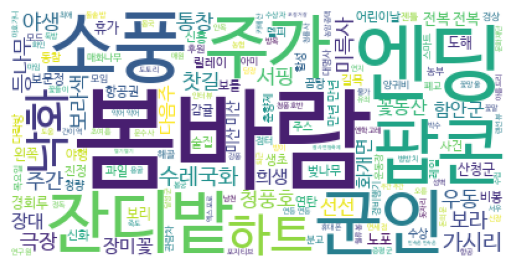

{'봄바람': 1.0,
 '엔딩': 0.5161290322580645,
 '소풍': 0.45161290322580644,
 '군인': 0.3870967741935484,
 '팝콘': 0.3870967741935484,
 '잔디밭': 0.3548387096774194,
 '주가': 0.3548387096774194,
 '하트': 0.3548387096774194,
 '낙화': 0.3548387096774194,
 '수레국화': 0.3548387096774194,
 '가시리': 0.3548387096774194,
 '찻길': 0.3225806451612903,
 '주간': 0.3225806451612903,
 '야생': 0.3225806451612903,
 '청풍호': 0.3225806451612903,
 '우동': 0.3225806451612903,
 '서핑': 0.3225806451612903,
 '통창': 0.3225806451612903,
 '극장': 0.3225806451612903,
 '미륵사': 0.3225806451612903,
 '보라': 0.3225806451612903,
 '등나무': 0.3225806451612903,
 '보라색': 0.3225806451612903,
 '선선': 0.2903225806451613,
 '장미꽃': 0.2903225806451613,
 '장대': 0.2903225806451613,
 '꽃동산': 0.2903225806451613,
 '다음주': 0.2903225806451613,
 '함안군': 0.2903225806451613,
 '화개면': 0.2903225806451613,
 '희생': 0.2903225806451613,
 '전복 전복': 0.2903225806451613,
 '왼쪽': 0.25806451612903225,
 '휴가': 0.25806451612903225,
 '산청군': 0.25806451612903225,
 '도해': 0.25806451612903225,
 '보리': 0.25806451612

In [361]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_text(spring_word)
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()
wordCloud.words_

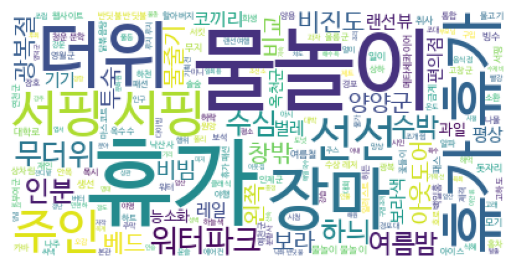

{'휴가': 1.0,
 '물놀이': 0.8793103448275862,
 '더위': 0.5517241379310345,
 '장마': 0.4827586206896552,
 '휴가 휴가': 0.41379310344827586,
 '서핑 서핑': 0.3620689655172414,
 '선선': 0.3275862068965517,
 '주인': 0.3275862068965517,
 '워터파크': 0.3103448275862069,
 '무더위': 0.29310344827586204,
 '수심': 0.27586206896551724,
 '하늬': 0.25862068965517243,
 '인분': 0.25862068965517243,
 '여름밤': 0.2413793103448276,
 '수박': 0.2413793103448276,
 '광복절': 0.22413793103448276,
 '창밖': 0.22413793103448276,
 '비진도': 0.22413793103448276,
 '아웃도어': 0.20689655172413793,
 '물줄기': 0.20689655172413793,
 '비교': 0.20689655172413793,
 '양양군': 0.20689655172413793,
 '베드': 0.20689655172413793,
 '보라': 0.20689655172413793,
 '투숙': 0.20689655172413793,
 '왼쪽': 0.20689655172413793,
 '비빔': 0.20689655172413793,
 '코끼리': 0.20689655172413793,
 '랜선뷰': 0.1896551724137931,
 '기기': 0.1896551724137931,
 '보라색': 0.1896551724137931,
 '레일': 0.1896551724137931,
 '벌레': 0.1896551724137931,
 '편의점': 0.1896551724137931,
 '평상': 0.1896551724137931,
 '능소화': 0.1896551724137931,
 '과

In [358]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_text(summer_word)
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()
wordCloud.words_

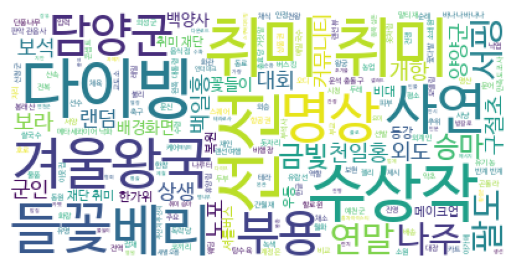

In [356]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_text(fall_word)
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [362]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_text(winter_word)
wordCloud.words_
# import matplotlib.pyplot as plt
# plt.imshow(wordCloud)
# plt.axis('off')
# plt.show()

{'겨울왕국': 1.0,
 '연말': 0.9473684210526315,
 '새해': 0.9210526315789473,
 '눈썰매': 0.7105263157894737,
 '설날': 0.5263157894736842,
 '상고대': 0.47368421052631576,
 '설산': 0.4473684210526316,
 '추위': 0.39473684210526316,
 '스케이트': 0.39473684210526316,
 '새해 새해': 0.39473684210526316,
 '아이젠': 0.3684210526315789,
 '소원': 0.3157894736842105,
 '업무': 0.3157894736842105,
 '판악 관음사': 0.3157894736842105,
 '재단': 0.2894736842105263,
 '눈썰매장': 0.2894736842105263,
 '산타': 0.2894736842105263,
 '암산': 0.2894736842105263,
 '수행 지급': 0.2894736842105263,
 '송어 송어': 0.2894736842105263,
 '분야': 0.2631578947368421,
 '플루': 0.2631578947368421,
 '몽환': 0.2631578947368421,
 '지속': 0.2631578947368421,
 '동백나무': 0.2631578947368421,
 '분화구': 0.2631578947368421,
 '눈썰매장 눈썰매장': 0.2631578947368421,
 '왕국': 0.23684210526315788,
 '장갑': 0.23684210526315788,
 '거울': 0.23684210526315788,
 '소망': 0.23684210526315788,
 '관음사 판악': 0.23684210526315788,
 '트렌드': 0.21052631578947367,
 '눈밭': 0.21052631578947367,
 '사철': 0.21052631578947367,
 '대피소': 0.21052631578